In [140]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_tbb = pd.read_csv("F:/do_an/dacn_nhom12/data/tay_bac_bo.csv")
duyen_hai = pd.read_csv("F:/do_an/dacn_nhom12/data/duyen_hai_ntb.csv")

tay_nguyen = pd.read_csv("F:/congcu/ML/tay_nguyen.csv")
#data = pd.concat([tay_bac_bo, duyen_hai, tay_nguyen], ignore_index=True)
# df_tbb.drop(['Qxt', 'Qxm', 'Ncxs', 'Ncxm'], axis=1, inplace=True)
# tay_nguyen.drop(['Qxt', 'Qxm', 'Ncxs', 'Ncxm'], axis=1, inplace=True)
# duyen_hai.drop(['Qxt', 'Qxm', 'Ncxs', 'Ncxm'], axis=1, inplace=True)
#df_tbb
#duyen_hai
tay_nguyen

,tên hồ,Thời điểm,htl,dbt,hc,Qve,Tqx,Qxt,Qxm,Ncxs,Ncxm
0,Pleikrông,01/01 23:00,569.98,570.0,537.0,30.00,42.00,0.00,42.00,0,0
1,Ialy,01/01 23:00,514.74,515.0,490.0,153.00,309.00,0.00,309.00,0,0
2,Sê San 3,01/01 23:00,304.03,304.5,303.2,316.00,243.00,0.00,243.00,0,0
3,Sê San 3A,01/01 23:00,238.91,239.0,238.5,216.00,245.00,0.00,245.00,0,0
4,Sê San 4,01/01 23:00,211.03,215.0,210.0,230.00,230.00,0.00,230.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21126,Đồng Nai 4,16/07 23:00,475.52,476.0,474.0,98.93,98.94,2.52,96.41,0,0
21127,Đơn Dương,16/07 23:00,1029.88,1042.0,1018.0,46.31,39.03,2.24,36.79,0,1
21128,Đại Ninh,16/07 23:00,867.66,880.0,860.0,27.00,14.77,0.77,14.00,0,0
21129,Hàm Thuận,16/07 23:00,580.76,605.0,575.0,65.43,58.10,0.00,58.10,0,0


In [141]:
# Kiểm tra các giá trống
print("tây bắc bộ")
df_tbb.isnull().sum()

tây bắc bộ


tên hồ         0
Thời điểm      0
htl            0
dbt            0
hc             0
Qve          732
Tqx            0
Qxt            0
Qxm            1
Ncxs           0
Ncxm           0
dtype: int64

In [115]:
print("Duyên hải")
duyen_hai.isnull().sum()

Duyên hải


tên hồ          0
Thời điểm       0
htl             0
dbt             0
hc              0
Qve             9
Tqx             0
Qxt             4
Qxm          2587
Ncxs            0
Ncxm            0
dtype: int64

In [116]:
print("Tây nguyên")
tay_nguyen.isnull().sum()

Tây nguyên


tên hồ         0
Thời điểm      0
htl            0
dbt          439
hc           439
Qve            6
Tqx            0
Qxt           15
Qxm            2
Ncxs           0
Ncxm           0
dtype: int64

In [142]:
#Kiểm tra dữ liệu của từng khu vực
def du_lieu_tong_quat():
    tbb = df_tbb.describe()
    tn = tay_nguyen.describe()
    dh = duyen_hai.describe()
    tbb

In [118]:
duyen_hai.describe()

,htl,dbt,hc,Qve,Tqx,Qxt,Qxm,Ncxs,Ncxm
count,11637.000000,11637.000000,11637.000000,11628.000000,11637.000000,11633.000000,9050.000000,11637.0,11637.000000
mean,486.776772,475.388889,455.211111,70.527168,74.563430,14.764265,76.899662,0.0,0.112056
std,1862.186226,308.517333,311.052171,684.329323,151.306244,101.696999,93.269788,0.0,0.679835
min,101.080000,105.000000,101.000000,-4227.600000,0.000000,0.000000,0.000000,0.0,0.000000
25%,204.240000,209.000000,196.000000,4.000000,0.000000,0.000000,13.200000,0.0,0.000000
50%,372.230000,380.000000,340.000000,20.060000,28.980000,0.000000,51.760000,0.0,0.000000
75%,774.820000,775.000000,765.000000,58.000000,78.600000,0.000000,96.000000,0.0,0.000000
max,198565.000000,981.000000,971.300000,66519.670000,5400.000000,5000.000000,400.000000,0.0,12.000000


In [143]:
#xu ly cac gia tri loi
# Hàm để thay thế giá trị 0 bằng giá trị trung bình của nhóm
def replace_zeros(group):
    mean_value = group[group > 0].mean()
    group[group <= 0] = mean_value
    return group

def replace_large_values(group):
    mean_value = group[group <= 1300].mean()  
    group[group > 1300] = mean_value  
    return group

def replace_large(group):
    mean_value = group[group <= 6000].mean()  
    group[group > 6000] = mean_value  
    return group


df_tbb['htl'] = df_tbb.groupby('tên hồ')['htl'].transform(replace_zeros)
duyen_hai['Qve'] = duyen_hai.groupby('tên hồ')['Qve'].transform(replace_zeros)

tay_nguyen['htl'] = tay_nguyen.groupby('tên hồ')['htl'].transform(replace_large_values)
duyen_hai['htl'] = duyen_hai.groupby('tên hồ')['htl'].transform(replace_large_values)

duyen_hai['Qve'] = duyen_hai.groupby('tên hồ')['Qve'].transform(replace_large)



In [144]:
def replace_max(group):
    mean_value = group[group <= 10000].mean()  
    group[group > 10000] = mean_value  
    return group
tay_nguyen['Qxm'] = tay_nguyen.groupby('tên hồ')['Qxm'].transform(replace_max)


In [145]:
# điền các giá trị nan theo từng hồ
df_tbb['Qve'] = df_tbb.groupby('tên hồ')['Qve'].transform(lambda x: x.fillna(x.mean()))
df_tbb['Qxm'] = df_tbb.groupby('tên hồ')['Qxm'].transform(lambda x: x.fillna(x.mean()))

duyen_hai['Qve'] = duyen_hai.groupby('tên hồ')['Qve'].transform(lambda x: x.fillna(x.mean()))
duyen_hai['Qxt'] = duyen_hai.groupby('tên hồ')['Qxt'].transform(lambda x: x.fillna(x.mean()))
duyen_hai['Qxm'] = duyen_hai.groupby('tên hồ')['Qxm'].transform(lambda x: x.fillna(x.mean()))

tay_nguyen['dbt'] = tay_nguyen.groupby('tên hồ')['dbt'].transform(lambda x: x.fillna(x.mean()))
tay_nguyen['hc'] = tay_nguyen.groupby('tên hồ')['hc'].transform(lambda x: x.fillna(x.mean()))
tay_nguyen['Qve'] = tay_nguyen.groupby('tên hồ')['Qve'].transform(lambda x: x.fillna(x.mean()))
tay_nguyen['Qxt'] = tay_nguyen.groupby('tên hồ')['Qxt'].transform(lambda x: x.fillna(x.mean()))
tay_nguyen['Qxm'] = tay_nguyen.groupby('tên hồ')['Qxm'].transform(lambda x: x.fillna(x.mean()))

In [146]:
duyen_hai.isna().sum()

tên hồ          0
Thời điểm       0
htl             0
dbt             0
hc              0
Qve             0
Tqx             0
Qxt             0
Qxm          2586
Ncxs            0
Ncxm            0
dtype: int64

In [147]:
# #xử lý giá trị nan ở duyen hai
duyen_hai['Qxm'] = duyen_hai.groupby('tên hồ')['Qxm'].transform(lambda x: x.fillna(0))
print(duyen_hai.isna().sum())

tên hồ       0
Thời điểm    0
htl          0
dbt          0
hc           0
Qve          0
Tqx          0
Qxt          0
Qxm          0
Ncxs         0
Ncxm         0
dtype: int64


In [124]:
duyen_hai

,tên hồ,Thời điểm,htl,dbt,hc,Qve,Tqx,Qxt,Qxm,Ncxs,Ncxm
0,A Vương,01/01 23:00,379.97,380.0,340.0,38.20,38.20,0.00,38.20,0,0
1,Sông Bung 2,01/01 23:00,605.00,605.0,565.0,16.32,16.32,0.00,16.32,0,0
2,Vĩnh Sơn A,01/01 23:00,775.25,775.0,765.0,2.81,13.20,0.00,13.20,0,0
3,Sông Bung 4,01/01 23:00,222.62,222.5,205.0,75.00,75.00,0.00,75.00,0,0
4,Vĩnh Sơn B,01/01 23:00,826.30,826.0,813.6,10.35,5.85,5.85,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11632,Vĩnh Sơn B,16/07 23:00,817.96,826.0,813.6,0.68,0.00,0.00,0.00,0,0
11633,Vĩnh Sơn C,16/07 23:00,973.20,981.0,971.3,0.44,0.00,0.00,0.00,0,0
11634,Sông Tranh 2,16/07 23:00,156.81,175.0,140.0,66.93,107.76,5.76,102.00,0,0
11635,Sông Ba Hạ,16/07 23:00,102.53,105.0,101.0,60.00,127.00,0.00,127.00,0,0


In [148]:
#cập nhật lại cột Tqx
df_tbb['Tqx'] = df_tbb['Qxm'] + df_tbb['Qxt']
tay_nguyen['Tqx'] = tay_nguyen['Qxm'] + tay_nguyen['Qxt']
duyen_hai['Tqx'] = duyen_hai['Qxm'] + duyen_hai['Qxt']

In [126]:
duyen_hai.describe()

,htl,dbt,hc,Qve,Tqx,Qxt,Qxm,Ncxs,Ncxm
count,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.0,11637.000000
mean,469.731225,475.388889,455.211111,65.420876,74.578442,14.760280,59.818161,0.0,0.112056
std,309.179655,308.517333,311.052171,160.894515,151.306399,101.679745,88.250942,0.0,0.679835
min,101.080000,105.000000,101.000000,0.010000,0.000000,0.000000,0.000000,0.0,0.000000
25%,204.240000,209.000000,196.000000,5.930000,0.000000,0.000000,0.000000,0.0,0.000000
50%,372.200000,380.000000,340.000000,21.480000,28.980000,0.000000,27.420000,0.0,0.000000
75%,774.800000,775.000000,765.000000,61.100000,78.600000,0.000000,76.000000,0.0,0.000000
max,982.650000,981.000000,971.300000,5655.000000,5400.000000,5000.000000,400.000000,0.0,12.000000


In [127]:
def xa_nuoc_qua_mua(df_tn, tenkhuvuc):
    df_tn['Thời điểm'] = pd.to_datetime(df_tn['Thời điểm'], format='%d/%m %H:%M', errors='coerce')

# Thêm cột 'month' và 'season'
    df_tn['month'] = df_tn['Thời điểm'].dt.month
    df_tn['season'] = pd.cut(df_tn['month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'], right=False)

# Tính toán trung bình lưu lượng xả theo mùa
    seasonal_discharge = df_tn.groupby('season')['Tqx'].mean()

# Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    ax = seasonal_discharge.plot(kind='bar', color='skyblue')
    plt.title('Average Discharge by Season')
    plt.xlabel(tenkhuvuc)
    plt.ylabel('Average Discharge')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')
    plt.show()
    df_tn.drop('month', axis = 1,inplace = True)
    df_tn.drop('season', axis = 1, inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11980\1985878880.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_discharge = df_tn.groupby('season')['Tqx'].mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_11980\1985878880.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_discharge = df_tn.groupby('season')['Tqx'].mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_11980\1985878880.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

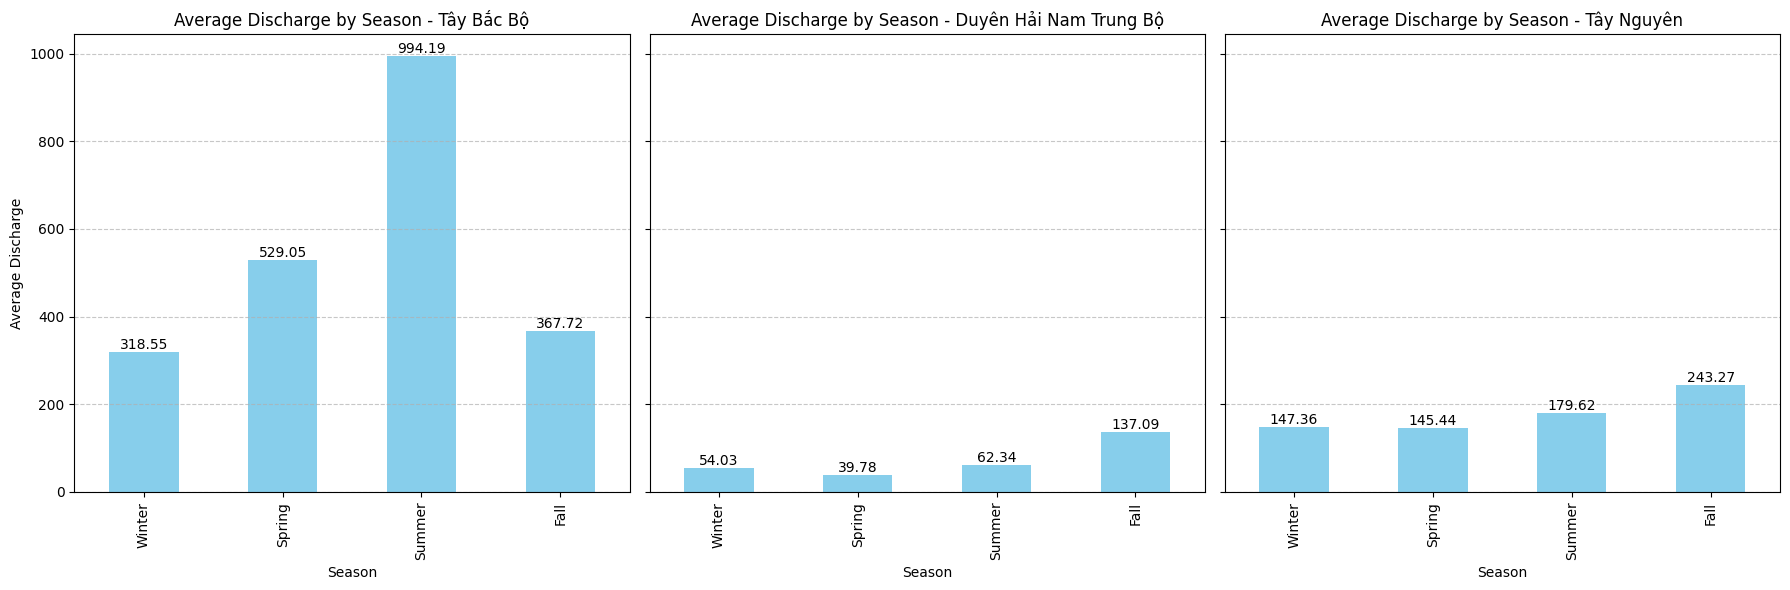

In [149]:
import matplotlib.pyplot as plt
import pandas as pd

def xa_nuoc_qua_mua(df_tn, tenkhuvuc, ax):
    df_tn['Thời điểm'] = pd.to_datetime(df_tn['Thời điểm'], format='%d/%m %H:%M', errors='coerce')

    # Thêm cột 'month' và 'season'
    df_tn['month'] = df_tn['Thời điểm'].dt.month
    df_tn['season'] = pd.cut(df_tn['month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'], right=False)

    # Tính toán trung bình lưu lượng xả theo mùa
    seasonal_discharge = df_tn.groupby('season')['Tqx'].mean()

    # Vẽ biểu đồ
    seasonal_discharge.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Average Discharge by Season - {tenkhuvuc}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Average Discharge')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Xóa các cột tạm thời
    df_tn.drop(['month', 'season'], axis=1, inplace=True)

# Tạo lưới các biểu đồ
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Vẽ các biểu đồ
xa_nuoc_qua_mua(df_tbb, "Tây Bắc Bộ", axs[0])
xa_nuoc_qua_mua(duyen_hai, "Duyên Hải Nam Trung Bộ", axs[1])
xa_nuoc_qua_mua(tay_nguyen, "Tây Nguyên", axs[2])

plt.tight_layout()
plt.show()

In [129]:
df_tbb.shape, duyen_hai.shape, tay_nguyen.shape

((7028, 11), (11637, 11), (21131, 11))

In [130]:
def luong_xa_tb_hoTD(df_tn, tenvung):
    average_discharge_per_reservoir = df_tn.groupby('tên hồ')['Tqx'].mean()

# Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    ax = average_discharge_per_reservoir.plot(kind='bar', color='skyblue')

    plt.title('Average Discharge per Reservoir')
    plt.xlabel(tenvung)
    plt.ylabel('Average Discharge')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm giá trị rõ ràng vào từng thanh
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

    plt.show()

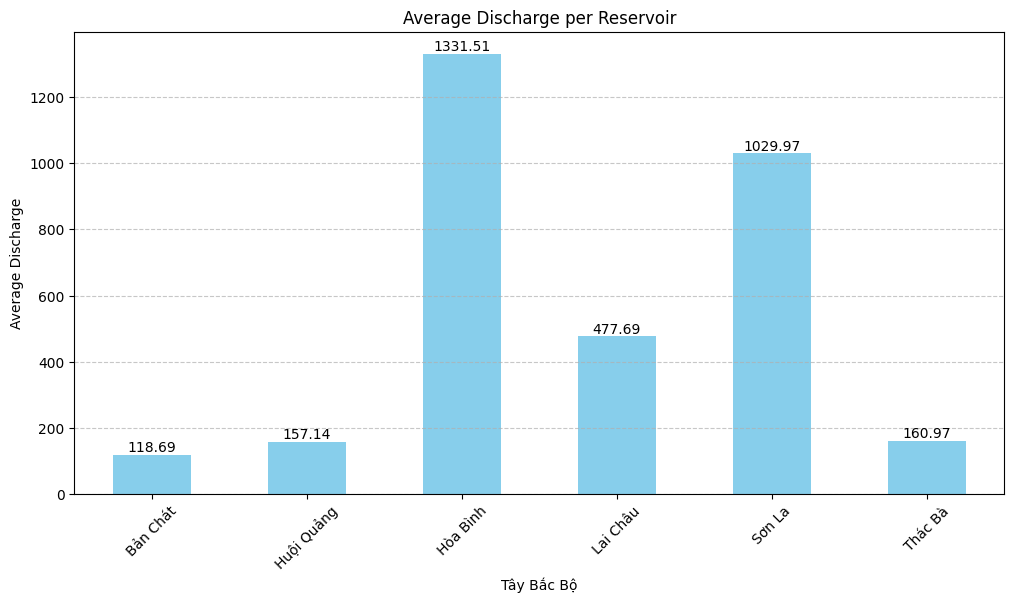

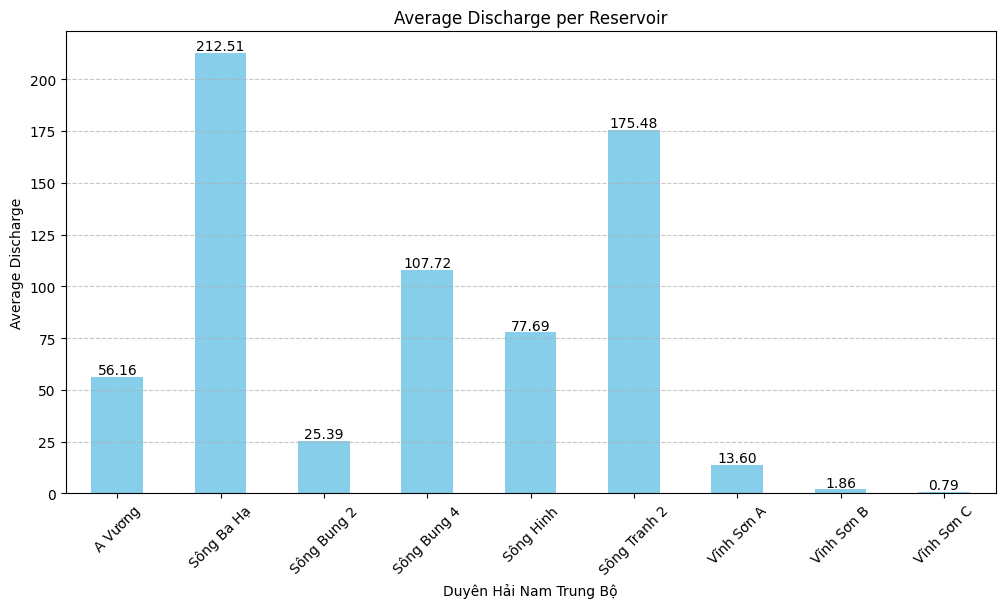

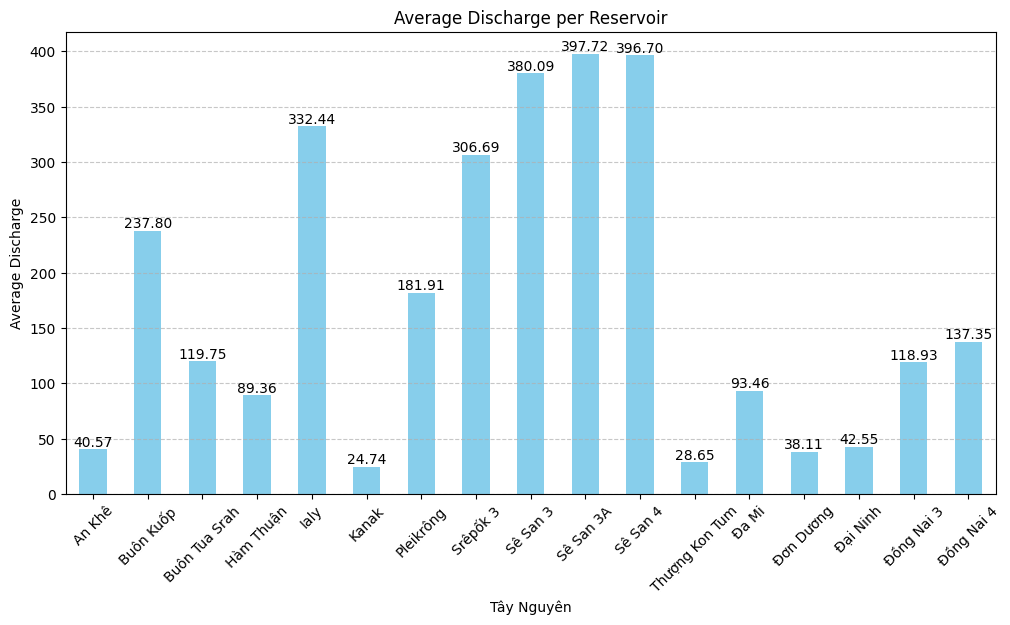

In [131]:
luong_xa_tb_hoTD(df_tbb, "Tây Bắc Bộ")
luong_xa_tb_hoTD(duyen_hai, "Duyên Hải Nam Trung Bộ")
luong_xa_tb_hoTD(tay_nguyen, "Tây Nguyên")

In [132]:
import seaborn as sns
def heatmap(df, tenvung):
    new = df.drop("tên hồ", axis = 1)    
    plt.figure(figsize=(10,10))

    sns.heatmap(new.corr(), fmt='.4f', linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white', annot=True)
    plt.xlabel(tenvung)
    plt.show()

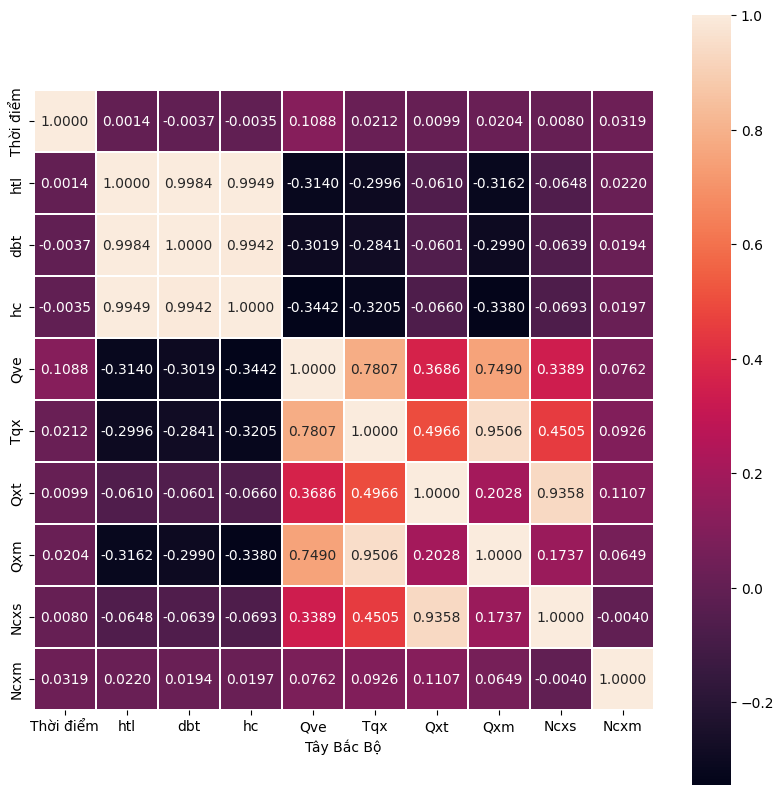

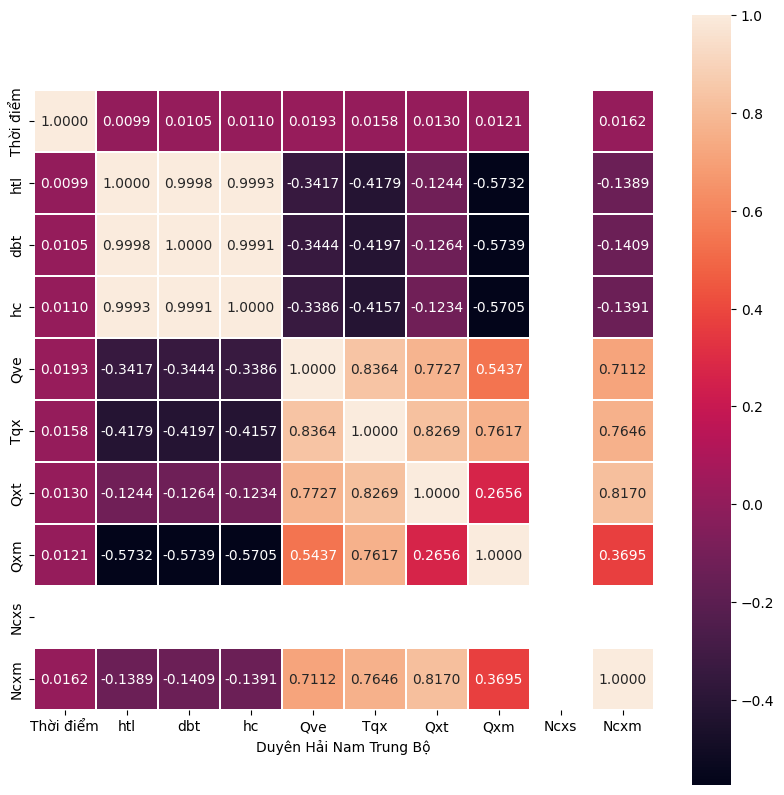

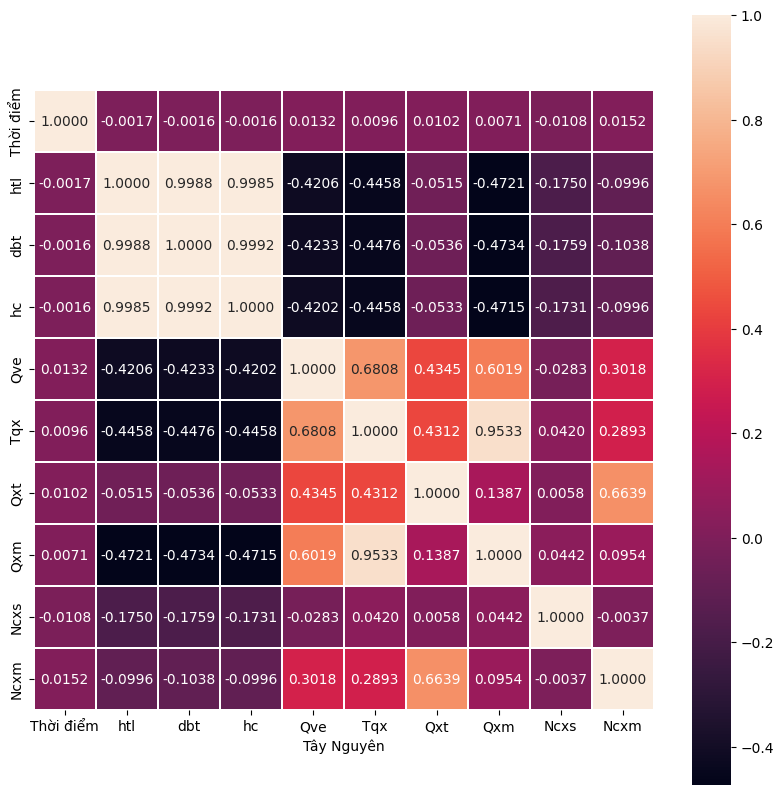

In [133]:
heatmap(df_tbb, "Tây Bắc Bộ")
heatmap(duyen_hai, "Duyên Hải Nam Trung Bộ")
heatmap(tay_nguyen, "Tây Nguyên")

In [134]:
tay_nguyen

,tên hồ,Thời điểm,htl,dbt,hc,Qve,Tqx,Qxt,Qxm,Ncxs,Ncxm
0,Pleikrông,1900-01-01 23:00:00,569.98,570.0,537.0,30.00,42.00,0.00,42.00,0,0
1,Ialy,1900-01-01 23:00:00,514.74,515.0,490.0,153.00,309.00,0.00,309.00,0,0
2,Sê San 3,1900-01-01 23:00:00,304.03,304.5,303.2,316.00,243.00,0.00,243.00,0,0
3,Sê San 3A,1900-01-01 23:00:00,238.91,239.0,238.5,216.00,245.00,0.00,245.00,0,0
4,Sê San 4,1900-01-01 23:00:00,211.03,215.0,210.0,230.00,230.00,0.00,230.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21126,Đồng Nai 4,1900-07-16 23:00:00,475.52,476.0,474.0,98.93,98.93,2.52,96.41,0,0
21127,Đơn Dương,1900-07-16 23:00:00,1029.88,1042.0,1018.0,46.31,39.03,2.24,36.79,0,1
21128,Đại Ninh,1900-07-16 23:00:00,867.66,880.0,860.0,27.00,14.77,0.77,14.00,0,0
21129,Hàm Thuận,1900-07-16 23:00:00,580.76,605.0,575.0,65.43,58.10,0.00,58.10,0,0


In [135]:

def bieudo_scatter(df, tenvung):
    attributes = ['htl', 'dbt', 'hc', 'Qve','Qxm','Qxt']
    plt.figure(figsize=(15, 5))

    for i, attr in enumerate(attributes):
        plt.subplot(1, len(attributes), i+1)
        plt.scatter(df[attr], df['Tqx'])
        plt.xlabel(attr)
        plt.ylabel('Tqx')
        plt.title(f'Scatter Plot: {attr} vs Tqx')

    plt.tight_layout()
    plt.show()

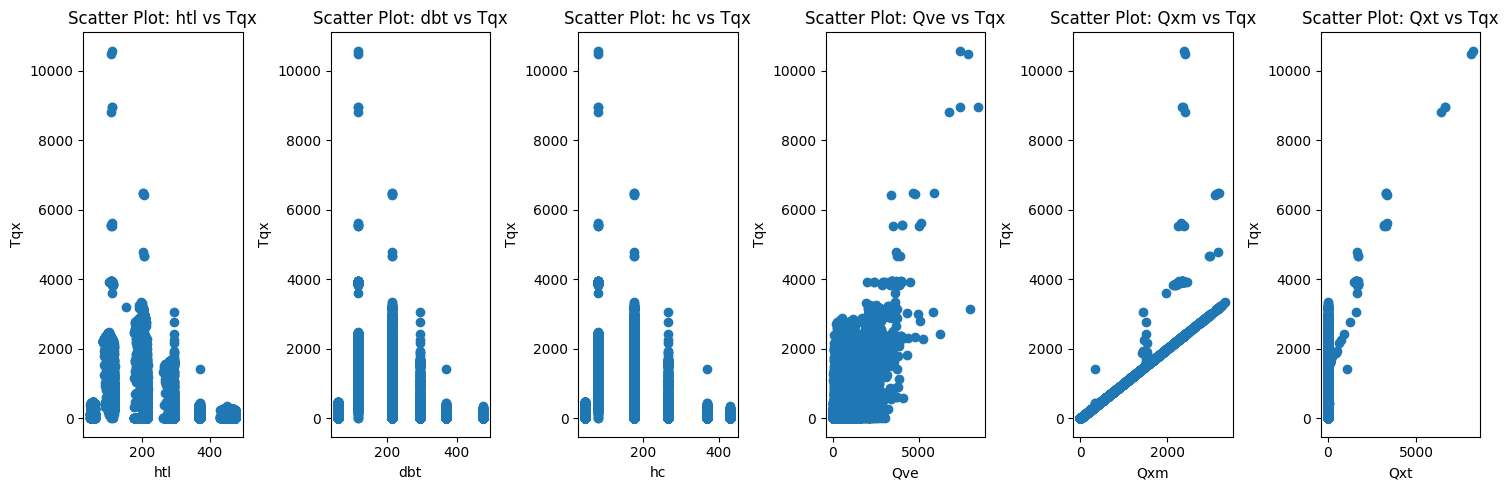

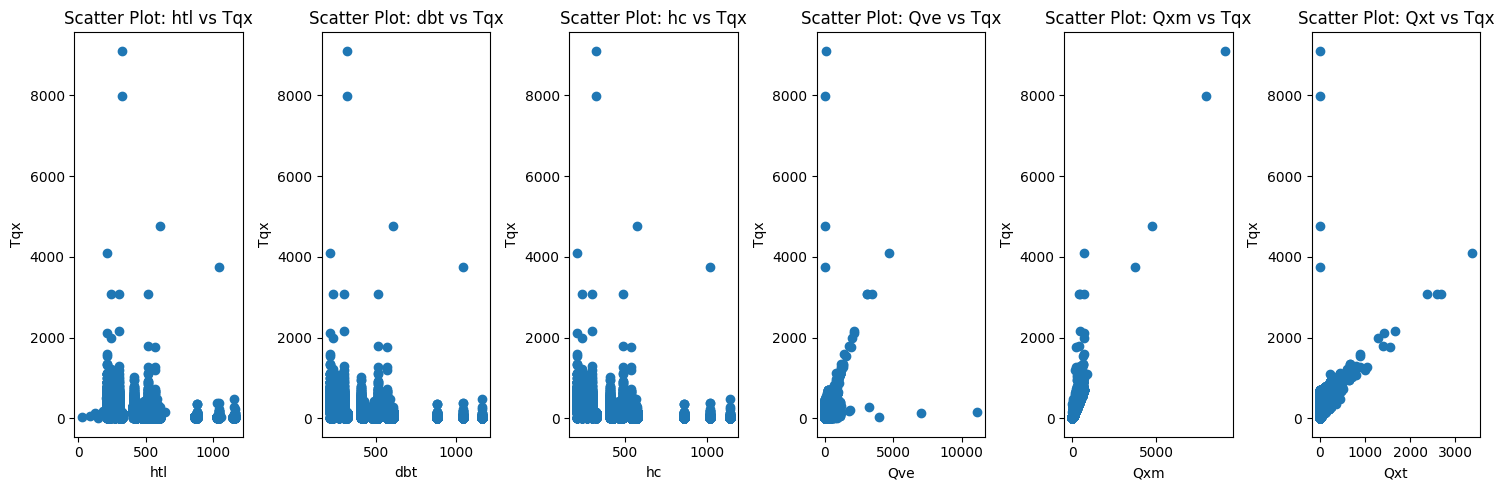

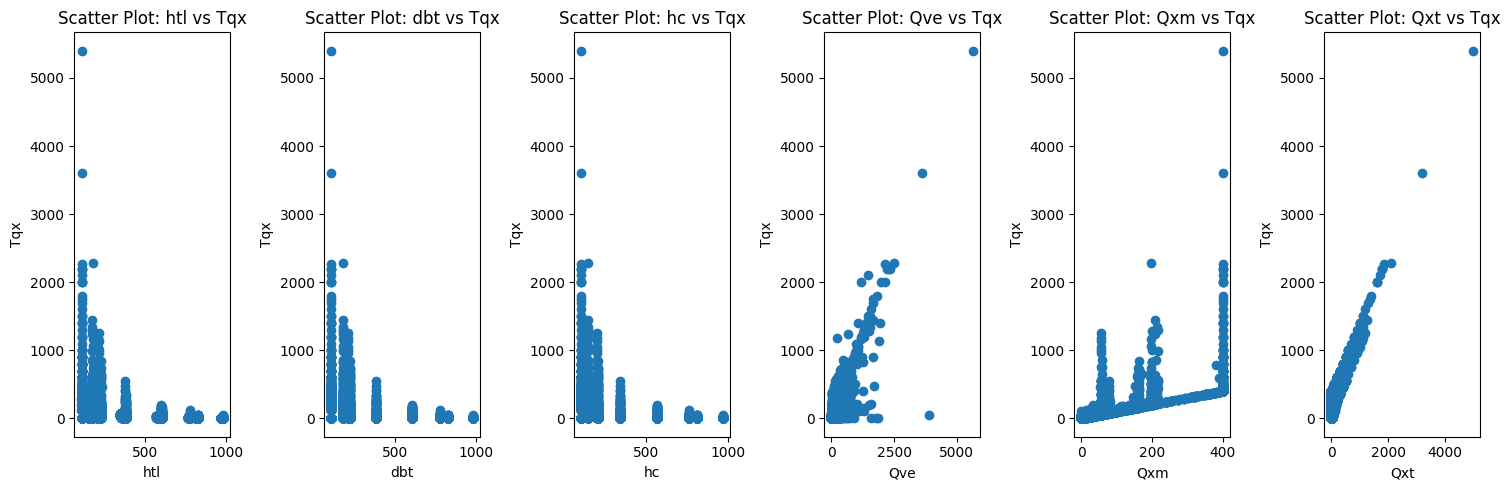

In [136]:
bieudo_scatter(df_tbb, "tây bắc bộ")
bieudo_scatter(tay_nguyen, 'tây nguyên')
bieudo_scatter(duyen_hai, 'duyen_hai')

In [137]:
df_tbb.drop(['htl', 'dbt', 'hc', 'Thời điểm', 'Ncxs', 'Ncxm'], axis=1, inplace=True)
tay_nguyen.drop(['htl', 'dbt', 'hc', 'Thời điểm', 'Ncxs', 'Ncxm'], axis=1, inplace=True)
duyen_hai.drop(['htl', 'dbt', 'hc', 'Thời điểm', 'Ncxs', 'Ncxm'], axis=1, inplace=True)


In [138]:
df_tbb, tay_nguyen, duyen_hai

(          tên hồ          Qve      Tqx   Qxt      Qxm
 0       Bản Chát    11.500000     0.00     0     0.00
 1     Huội Quảng     5.300000     0.00     0     0.00
 2         Sơn La   861.000000     0.00     0     0.00
 3       Hòa Bình   200.000000   829.00     0   829.00
 4        Thác Bà   117.170515     0.00     0     0.00
 ...          ...          ...      ...   ...      ...
 7023    Bản Chát   170.400000   245.90     0   245.90
 7024  Huội Quảng   300.000000   351.00     0   351.00
 7025      Sơn La  2561.000000  3000.00     0  3000.00
 7026    Hòa Bình  5011.000000  5534.00  3279  2255.00
 7027     Thác Bà   450.000000   446.72     0   446.72
 
 [7028 rows x 5 columns],
            tên hồ     Qve     Tqx   Qxt     Qxm
 0       Pleikrông   30.00   42.00  0.00   42.00
 1            Ialy  153.00  309.00  0.00  309.00
 2        Sê San 3  316.00  243.00  0.00  243.00
 3       Sê San 3A  216.00  245.00  0.00  245.00
 4        Sê San 4  230.00  230.00  0.00  230.00
 ...           ...

In [139]:
df_tbb.to_csv("F:/do_an/dacn_nhom12/data/data_train/tbb.csv", index=False)
tay_nguyen.to_csv("F:/do_an/dacn_nhom12/data/data_train/tn.csv", index=False)
duyen_hai.to_csv("F:/do_an/dacn_nhom12/data/data_train/dh.csv", index=False)